In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Directory with training horse pictures
train_horse = os.path.join('/content/drive/MyDrive/train/horses')

# Directory with training human pictures
train_human = os.path.join('/content/drive/MyDrive/train/human')

# Directory with validation horse pictures
validation_horse = os.path.join('/content/drive/MyDrive/validation/horses1')

# Directory with validation human pictures
validation_human = os.path.join('/content/drive/MyDrive/validation/human-validation')

In [ ]:
train_horse_names = os.listdir(train_horse)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['HorseBreeds-1024x682.jpg', 'How-to-Draw-a-Horse-web.jpg.webp', 'Morgan-stallion-bay-coat.jpg', 'types-horse-markings.jpg', 'nexgen-blog-header3.jpg', 'HG-hot-fizzy-horse-blog-281021-002.jpg', 'COVER-Horse-Babies-Canva.jpg', 'Feature-Image-730x510.jpg', 'andalusian-horse.jpg', 'walking-horse-mural-wallpaper-room.jpg']
TRAIN SET HUMANS: ['baby-740167__340.jpg', 'beautiful-1274051__340.jpg', 'baby-878770__340.jpg', 'baby-76154__340.jpg', 'baby-784607__340.jpg', 'baby-look-196914__340.jpg', 'beautiful-1274064__340.jpg', 'beautiful-1687932__340.jpg', 'beautiful-1687977__340.jpg', 'beautiful-1255357__340.jpg']
VAL SET HORSES: ['horse2-011.png', 'horse1-127.png', 'horse3-141.png', 'horse2-544.png', 'horse3-217.png', 'horse2-269.png', 'horse2-183.png', 'horse3-469.png', 'horse2-441.png', 'horse1-276.png']
VAL SET HUMANS: ['image2.jpeg', 'image5.jpeg', 'image3.jpeg', 'image6.jpeg', 'image4.jpeg', 'image7.jpeg', 'image.jpeg', 'image31.png', 'images26.jpg', 'image30.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

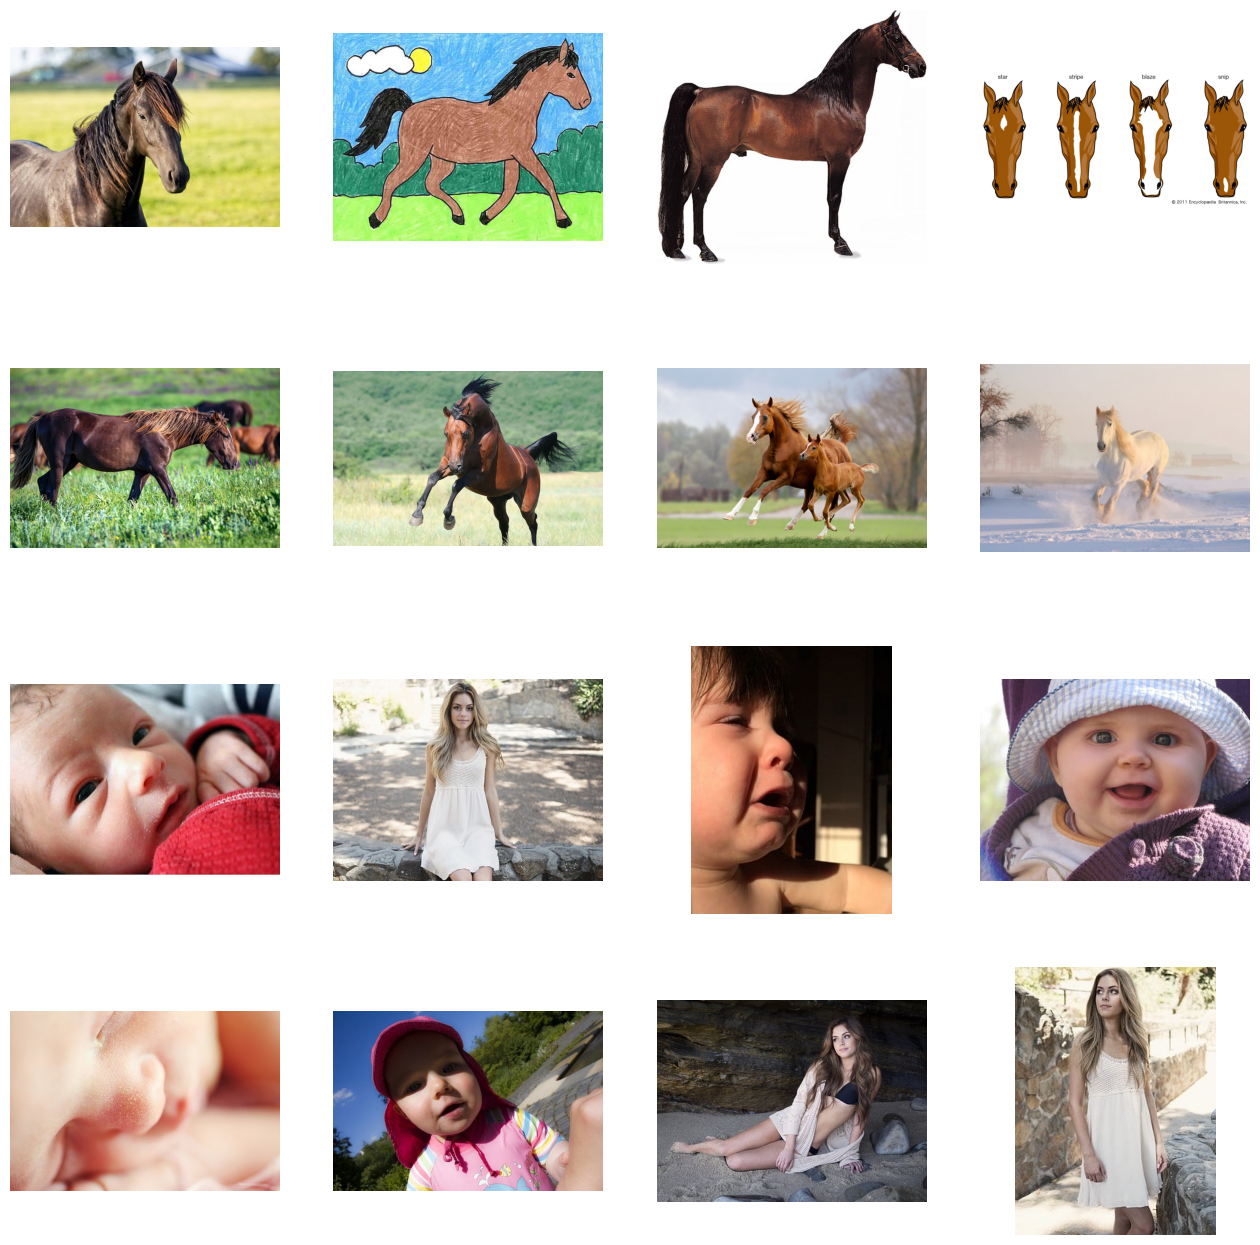

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build Another Model

import tensorflow as tf

model =Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2,2),
    #-------------------------------
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    #-------------------------------
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    #-------------------------------
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    #-------------------------------
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    #-------------------------------
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten
    Flatten(),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    #----------
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>0.995:
            print("\nReached 0.995 accuracy so stopping training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/train',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
       '/content/drive/MyDrive/validation',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

Found 1903 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[callbacks])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.6733

8/8 [==============================] - 212s 28s/step - loss: 0.6955 - accuracy: 0.6733 - val_loss: 0.6848 - val_accuracy: 0.6735
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 0.6661 - accuracy: 0.6934
Epoch 3/100
8/8 [==============================] - 12s 1s/step - loss: 0.6192 - accuracy: 0.6922
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 0.6086 - accuracy: 0.6931
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.5690 - accuracy: 0.7011
Epoch 6/100
8/8 [==============================] - 11s 1s/step - loss: 0.5561 - accuracy: 0.6807
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.4980 - accuracy: 0.7458
Epoch 8/100
8/8 [==============================] - 11s 1s/step - loss: 0.4996 - accuracy: 0.7461
Epoch 9/100
8/8 [==============================] - 11s 1s/step - loss: 0.4594 - accuracy: 0.7736
Epoch 10/100
8/8 [==============================] - 11s 1s/step - loss: 0.4434 - accuracy: 0.800

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>=0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
